In [3]:

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

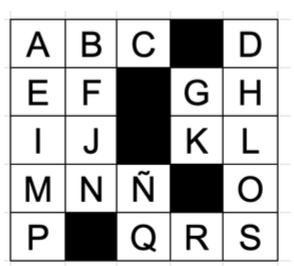

In [4]:
# We model the graph as a dictionary

graph = {
    'A': ['B', 'E'],
    'B': ['A', 'C', 'F'],
    'C':['B'],
    'D':['H'],
    'E':['A', 'F', 'I'],
    'F': ['B', 'E', 'J'],
    'G':['H', 'K'],
    'H':['D', 'G', 'L'],
    'I':['E', 'J', 'M'],
    'J':['F', 'I', 'N'],
    'K':['G', 'L'],
    'L':['H', 'K', 'O'],
    'M':['I', 'N', 'P'],
    'N':['J', 'M','Ñ'],
    'O':['L', 'S'],
    'P':['M'],
    'Q':['Ñ','R'],
    'R':['Q','S'],
    'S':['O','R']
}

In [7]:
# Ask for user input for the initial and goal nodes
intial_node, goal_node = [input('Enter the initial node: ').upper(), input('Enter the goal node: ').upper()]

In [8]:
def dfs_optimized(grafo, inicio, objetivo, visitados=None, camino=None, caminos_encontrados=None, nivel=0, verbose=False):
    nivel += 1
    if verbose:
        print("\nNivel de profundidad:", nivel)
    
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if verbose:
        print("Nodo actual:", inicio, "Nodos visitados", visitados, "Camino Actual:", camino)

    if inicio == objetivo:
        if verbose:
            print("Camino encontrado:", ' -> '.join(camino))
        caminos_encontrados.append(list(camino))
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs_optimized(grafo, vecino, objetivo, visitados, camino, caminos_encontrados, nivel, verbose)

    camino.pop()

    return caminos_encontrados


In [ ]:
def bfs_optimized(grafo, inicio, objetivo, verbose=False):
    visitados = set()
    cola = deque([(inicio, [inicio])])
    caminos = []

    iteracion = 1
    while cola:
        nodo_actual, camino = cola.popleft()
        if verbose:
            print("\nIteración:", iteracion)
            print("Nodo actual:", nodo_actual)

        if nodo_actual == objetivo:
            caminos.append(camino)

        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            if verbose:
                print("Nodos visitados", visitados)

            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    if verbose:
                        print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        iteracion += 1

    return caminos